<a href="https://colab.research.google.com/github/rbarner14/ML_practice/blob/master/Intro_to_Visualizations_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the California Housing dataset. 


In [0]:
h_ocean = 9136/20640
inland = 6551/20640
n_ocean = 2658/20640
n_bay = 2290/20640
island = 5/20640


print(h_ocean)
print(inland)
print(n_ocean)
print(n_bay)
print(island)

0.44263565891472867
0.31739341085271316
0.12877906976744186
0.11094961240310078
0.00024224806201550387


In [0]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib


HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

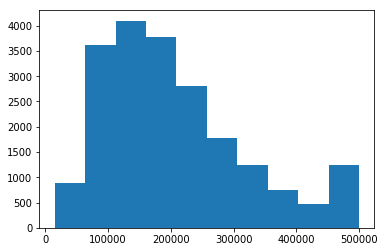

In [0]:
plt.hist(housing['median_house_value'])

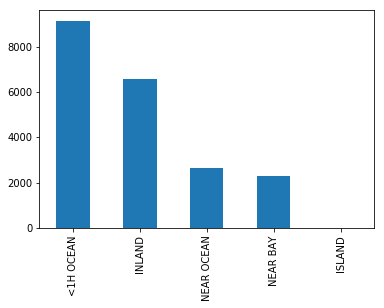

In [0]:
housing['ocean_proximity'].value_counts().plot(kind="bar")

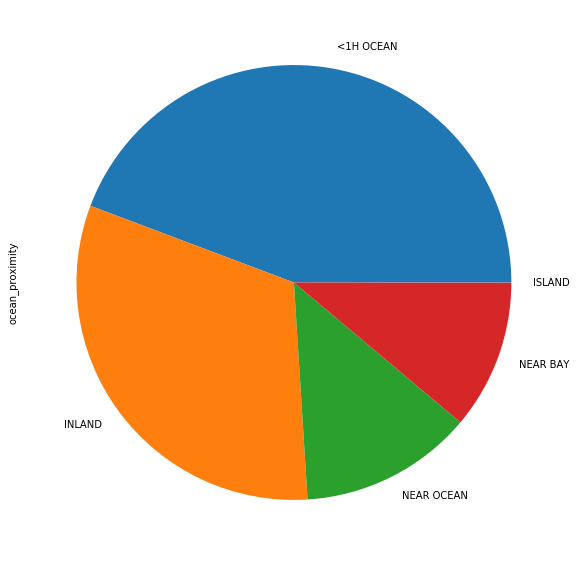

In [0]:
housing['ocean_proximity'].value_counts().plot(kind="pie", figsize=(10,10))

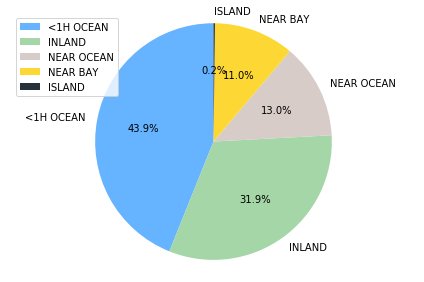

In [0]:
# Pie chart
labels = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
sizes = [44, 32, 13, 11, 0.2]
#colors
colors = ['#66b3ff','#A5D6A7', '#D7CCC8', '#FDD835', '#263238']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(loc = 'upper left')
plt.show()

In [0]:
plt.scatter(housing['median_income'], housing['median_housing_value'])
housing.corr()['median_house_value'].sort_

KeyError: ignored

Let's  move on to another type of plot that is useful for showing correlations. We would expect to see a correlation between the income and the house value, as more income would most likely mean a nicer home.

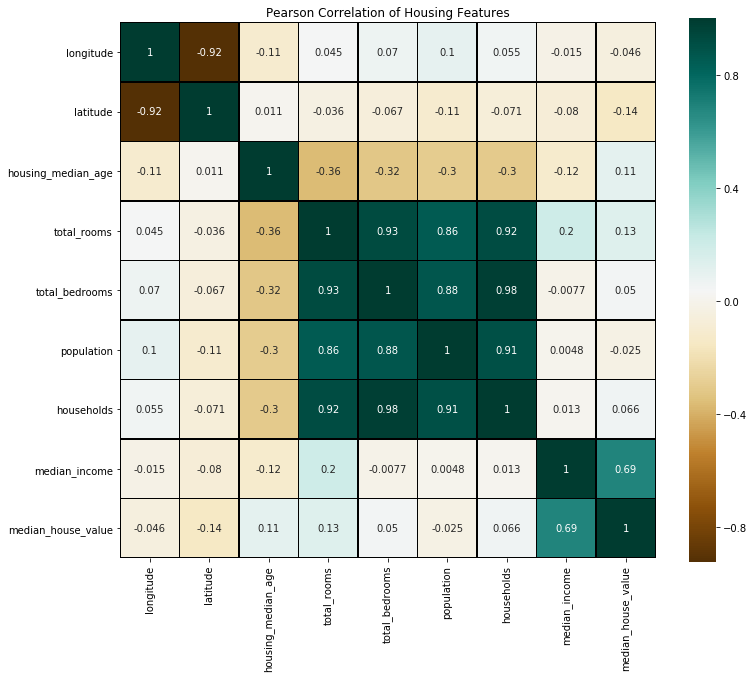

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Housing Features')

# Draw the heatmap using seaborn
sns.heatmap(housing.corr(),linewidths=0.25, square=True, cmap = "BrBG", linecolor='black', annot=True)

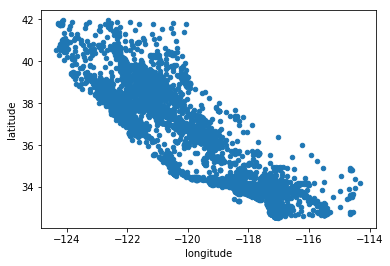

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude")

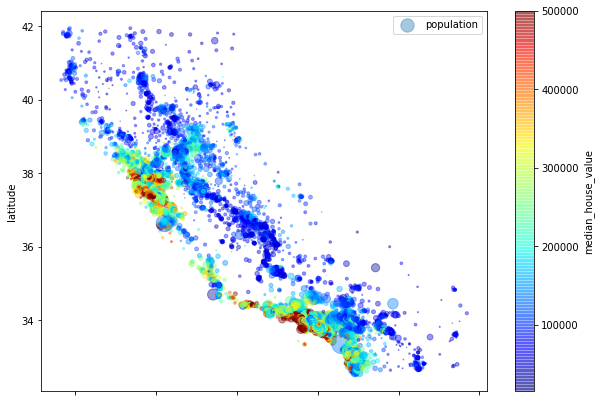

In [0]:
housing.plot(kind="scatter",
             x="longitude", y="latitude",
             alpha=0.4, s=housing['population']/100,
             label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap('jet'),
             colorbar=True,)
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


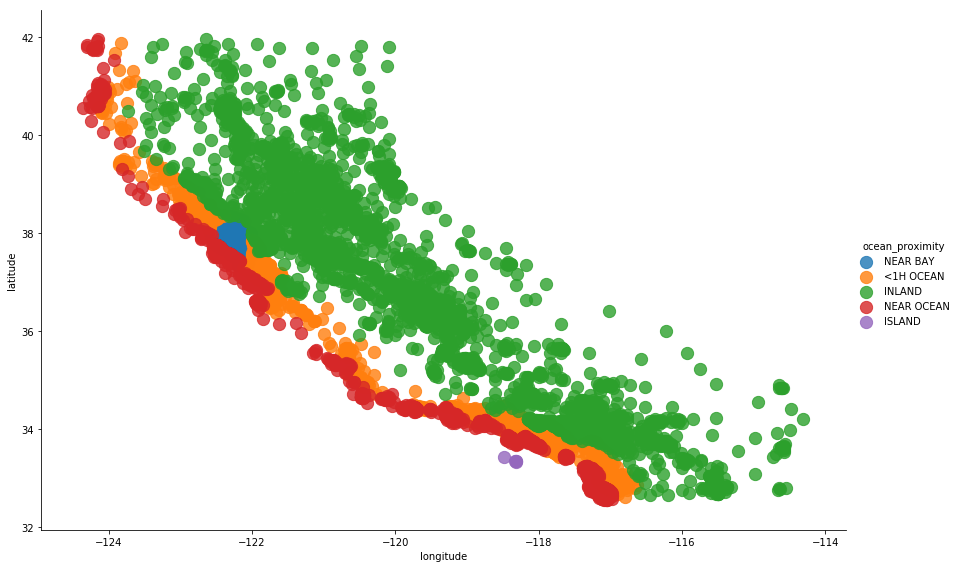

In [0]:
ocean_proximity_graph = sns.lmplot(data=housing,
                                  x="longitude", y="latitude",
                                  fit_reg=False, hue="ocean_proximity",
                                  size=8,aspect=1.5, scatter_kws={'s':150})